In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
# View the first few records
df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,NaN
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,NaN
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,NaN
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,NaN
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,NaN


In [4]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33610 entries, 0 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   location_type           33610 non-null  object
 4   cellphone_access        33610 non-null  object
 5   household_size          33610 non-null  int64 
 6   age_of_respondent       33610 non-null  int64 
 7   gender_of_respondent    33610 non-null  object
 8   relationship_with_head  33610 non-null  object
 9   marital_status          33610 non-null  object
 10  education_level         33610 non-null  object
 11  job_type                33610 non-null  object
 12  bank_account            23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.3+ MB


In [5]:
# Statistical summary of the dataset
df.describe()

,year,household_size,age_of_respondent
count,33610.000000,33610.000000,33610.000000
mean,2016.975930,3.791877,38.656114
std,0.847353,2.223138,16.447127
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [6]:
# checking for spaces in
print(df.columns)

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')


In [7]:
# Check for missing values
df.isnull().sum()

country                       0
year                          0
uniqueid                      0
location_type                 0
cellphone_access              0
household_size                0
age_of_respondent             0
gender_of_respondent          0
relationship_with_head        0
marital_status                0
education_level               0
job_type                      0
bank_account              10086
dtype: int64

In [12]:
# check for unique values in column bank_account
df['bank_account'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [19]:
# create a new data frame without the NaN in our target feature
df_wo_target_nan = df.dropna(axis=0)

In [20]:
df_wo_target_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23524 entries, 10086 to 33609
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
 12  bank_account            23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.5+ MB


In [21]:
df_wo_target_nan.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [23]:
df_wo_target_nan.head().T

,10086,10087,10088,10089,10090
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age_of_respondent,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child
marital_status,Married/Living together,Widowed,Single/Never Married,Married/Living together,Single/Never Married


In [31]:
for column in df_wo_target_nan.columns:
    unique_values = df_wo_target_nan[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique value(s):")
    print(unique_values)
    print()

Column 'country' has 4 unique value(s):
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']

Column 'year' has 3 unique value(s):
[2018 2016 2017]

Column 'uniqueid' has 8735 unique value(s):
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']

Column 'location_type' has 2 unique value(s):
['Rural' 'Urban']

Column 'cellphone_access' has 2 unique value(s):
['Yes' 'No']

Column 'household_size' has 20 unique value(s):
[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]

Column 'age_of_respondent' has 85 unique value(s):
[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]

Column 'gender_of_respondent' has 2 unique value(s):
['Female' 'Male']

Column 'relations

In [35]:
from scipy.stats import chi2_contingency

### Try to find out if there is a relation between the features (which contains objects) and our target feature, using the "Cramers V"

#### Small Effect: 
Cramér's V values close to 0 indicate a weak or negligible association between the categorical variables.

#### Medium Effect: 
Cramér's V values around 0.1 to 0.3 suggest a moderate association. This indicates that the variables have some degree of dependency, but the association may not be very strong.

#### Large Effect: 
Cramér's V values close to 0.3 or higher indicate a relatively strong association between the categorical variables. This suggests a notable dependency or relationship between the variables.

In [38]:
# country vs bank_account

column_name = 'country'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 837.961907796301
p-value: 2.5290257400600255e-181
Cramér's V: 0.1887367850827516


In [40]:
# year vs bank_account

column_name = 'year'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 488.8145974683432
p-value: 7.165703314454751e-107
Cramér's V: 0.14415061447779223


In [41]:
# household_size vs bank_account

column_name = 'household_size'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 111.36007750025391
p-value: 4.473649251338268e-15
Cramér's V: 0.06880328545165011


In [42]:
# age_of_respondent vs bank_account

column_name = 'age_of_respondent'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 460.9312218964729
p-value: 2.1730292133477746e-53
Cramér's V: 0.13997886829740108


In [43]:
# relationship_with_head vs bank_account

column_name = 'relationship_with_head'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 327.90665554178617
p-value: 9.9629019270655e-69
Cramér's V: 0.11806455389095226


In [44]:
# marital_status vs bank_account

column_name = 'marital_status'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 193.29187150436812
p-value: 1.03957918709173e-40
Cramér's V: 0.09064653551927963


In [45]:
# education_level vs bank_account

column_name = 'education_level'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 3549.125449633797
p-value: 0.0
Cramér's V: 0.38842313562899866


In [47]:
# job_type vs bank_account

column_name = 'job_type'
target_column = 'bank_account'

# Create a contingency table
contingency_table = pd.crosstab(df_wo_target_nan[column_name], df_wo_target_nan[target_column])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = len(df_wo_target_nan)
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Chi-square:", chi2)
print("p-value:", p)
print("Cramér's V:", cramers_v)

Chi-square: 3032.254227408195
p-value: 0.0
Cramér's V: 0.3590270905777935


In [48]:
# Assuming 'df' is your DataFrame containing the columns

# Initialize an empty matrix to store Cramér's V values
n_columns = len(df_wo_target_nan.columns)
cramers_matrix = np.zeros((n_columns, n_columns))

# Iterate over each pair of columns
for i in range(n_columns):
    for j in range(n_columns):
        # Create a contingency table for the column pair
        contingency_table = pd.crosstab(df_wo_target_nan.iloc[:, i], df.iloc[:, j])
        
        # Perform the chi-square test and calculate Cramér's V
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = len(df_wo_target_nan)
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        
        # Store the Cramér's V value in the matrix
        cramers_matrix[i, j] = cramers_v

# Create a DataFrame from the matrix with column names as indices and columns
cramers_df = pd.DataFrame(cramers_matrix, index=df_wo_target_nan.columns, columns=df_wo_target_nan.columns)

print(cramers_df)

                         country      year  uniqueid  location_type   
country                 1.000000  1.000000  0.346653       0.483880  \
year                    1.000000  1.000000  0.335476       0.478689   
uniqueid                0.346653  0.335476  1.000000       0.542420   
location_type           0.483880  0.478689  0.542420       0.999911   
cellphone_access        0.222506  0.215851  0.592125       0.085139   
household_size          0.314922  0.369014  0.564693       0.293113   
age_of_respondent       0.110258  0.110073  0.609139       0.094288   
gender_of_respondent    0.048606  0.019064  0.604991       0.012836   
relationship_with_head  0.155695  0.157600  0.595323       0.109320   
marital_status          0.284771  0.346987  0.582245       0.284760   
education_level         0.184668  0.220311  0.599277       0.132853   
job_type                0.451830  0.435302  0.582489       0.414813   
bank_account            0.188737  0.144151  0.594507       0.087163   

     

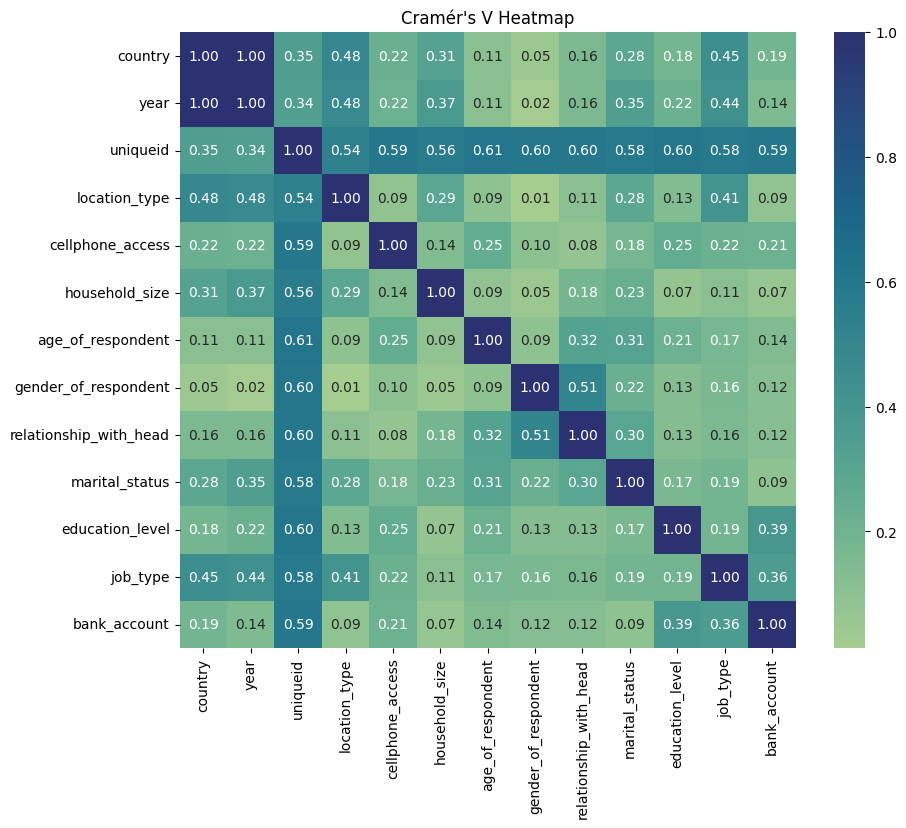

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize an empty matrix to store Cramér's V values
n_columns = len(df_wo_target_nan.columns)
cramers_matrix = np.zeros((n_columns, n_columns))

# Iterate over each pair of columns
for i in range(n_columns):
    for j in range(n_columns):
        # Create a contingency table for the column pair
        contingency_table = pd.crosstab(df_wo_target_nan.iloc[:, i], df.iloc[:, j])
        
        # Perform the chi-square test and calculate Cramér's V
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = len(df_wo_target_nan)
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        
        # Store the Cramér's V value in the matrix
        cramers_matrix[i, j] = cramers_v

# Create a DataFrame from the matrix with column names as indices and columns
cramers_df = pd.DataFrame(cramers_matrix, index=df_wo_target_nan.columns, columns=df_wo_target_nan.columns)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_df, annot=True, fmt=".2f", cmap="crest", square=True)
plt.title("Cramér's V Heatmap")
plt.show()

In [ ]:
'''                        bank_account  
country                     0.188737  
year                        0.144151  
uniqueid                    0.594507  
location_type               0.087163  
cellphone_access            0.209529  
household_size              0.068803  
age_of_respondent           0.139979  
gender_of_respondent        0.117110  
relationship_with_head      0.118065  
marital_status              0.090647  
education_level             0.388423  
job_type                    0.359027  
bank_account                0.999824'''